<a href="https://colab.research.google.com/github/DhruvChoudhary1/DhruvChoudhary1/blob/main/FRAUDDETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os


In [ ]:
path =  kagglehub.dataset_download("arshiyakishore/credit-card-fraud-detection-dataset")


print("Downloaded files:", os.listdir(path))

csv_file = os.path.join(path, "creditcard.csv")  # Replace with the correct file name from os.listdir
print("CSV File Path:", csv_file)

# Read the CSV into a DataFrame
df = pd.read_csv(csv_file)
print(df.head())






Downloaded files: ['creditcard.csv']
CSV File Path: /root/.cache/kagglehub/datasets/arshiyakishore/credit-card-fraud-detection-dataset/versions/1/creditcard.csv
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.10

In [ ]:
col_del = ['Time' ,'V5', 'V6', 'V7', 'V8', 'V9','V13','V15', 'V16',  'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [ ]:
tr_df = df.drop(col_del,axis =1)
tr_df.shape









































































































(284807, 10)

In [ ]:
# Check if the "fraud_label" column exists
if "fraud_label" in df.columns:
    # The column exists
    X = df.drop("fraud_label", axis=1)
    y = df["fraud_label"]


In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
legit_sample = legit.sample(n=49200)

In [ ]:
new_Dataset = pd.concat([legit_sample,fraud], axis = 0)

In [ ]:
new_Dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
206300,136156.0,1.185779,-1.112178,-2.534335,1.479236,0.461130,-0.756893,1.371307,-0.531924,-0.219808,...,0.394340,0.170559,-0.396045,0.626793,0.326201,-0.557087,-0.121213,0.022634,468.07,0
177927,123405.0,-0.609550,0.739694,-1.527061,1.035486,0.473806,-0.756439,1.897570,-0.050096,-1.096229,...,0.441707,0.946728,0.458652,-0.424438,-0.592559,-0.495552,0.332140,0.251530,239.88,0
59629,48926.0,1.123338,-0.412417,0.850989,0.238697,-0.655011,0.579548,-0.843986,0.264913,0.536652,...,0.232311,0.571611,-0.240280,-0.762983,0.298818,0.624464,-0.001570,0.019676,66.00,0
32587,36865.0,1.118214,0.106565,0.496715,1.329811,-0.274445,0.001885,-0.108446,0.179254,0.174499,...,-0.052227,0.011923,-0.031689,0.216326,0.573206,-0.338769,0.030683,0.004675,2.49,0
247647,153645.0,1.903023,-0.299770,-1.544123,0.143480,-0.085081,-1.531938,0.533070,-0.463691,0.513508,...,-0.093464,-0.416272,0.160961,0.036786,-0.121888,-0.168325,-0.074813,-0.043650,100.00,0


In [ ]:
new_Dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94910.376382,0.022965,-0.002349,0.014616,-0.006901,0.010440,0.002682,0.006171,-0.001156,0.001729,...,0.000297,-0.004661,-0.002279,-0.000919,0.001941,-0.005270,-0.002445,-0.000551,-0.002660,87.144458
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
X= new_Dataset.drop(columns='Class', axis=1)

In [ ]:
Y = new_Dataset['Class']

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
206300  136156.0  1.185779 -1.112178 -2.534335  1.479236  0.461130 -0.756893   
177927  123405.0 -0.609550  0.739694 -1.527061  1.035486  0.473806 -0.756439   
59629    48926.0  1.123338 -0.412417  0.850989  0.238697 -0.655011  0.579548   
32587    36865.0  1.118214  0.106565  0.496715  1.329811 -0.274445  0.001885   
247647  153645.0  1.903023 -0.299770 -1.544123  0.143480 -0.085081 -1.531938   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
X_train.shape

(34784, 30)

In [ ]:
X_test.shape

(14908, 30)

In [ ]:
sequence_length = 10
X_train_sequences = []
Y_train_sequences = []

for i in range(sequence_length, len(X_train)):
    X_train_sequences.append(X_train[i - sequence_length:i])
    Y_train_sequences.append(Y_train.values[i])

X_train_sequences = np.array(X_train_sequences)
Y_train_sequences = np.array(Y_train_sequences)

X_test_sequences = []
Y_test_sequences = []

for i in range(sequence_length, len(X_test)):
    X_test_sequences.append(X_test[i - sequence_length:i])
    Y_test_sequences.append(Y_test.values[i])

X_test_sequences = np.array(X_test_sequences)
Y_test_sequences = np.array(Y_test_sequences)


In [ ]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_sequences.shape[1], X_train_sequences.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train_sequences, Y_train_sequences, epochs=10, batch_size=64)

Epoch 1/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9773 - loss: 0.0995
Epoch 2/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9892 - loss: 0.0597
Epoch 3/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9895 - loss: 0.0590
Epoch 4/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9896 - loss: 0.0580
Epoch 5/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9903 - loss: 0.0549
Epoch 6/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9892 - loss: 0.0597
Epoch 7/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9905 - loss: 0.0538
Epoch 8/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9903 - loss: 0.0547
Epoch 9/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9897 - loss: 0.0575
Epoch 10/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9892 - loss: 0.0597


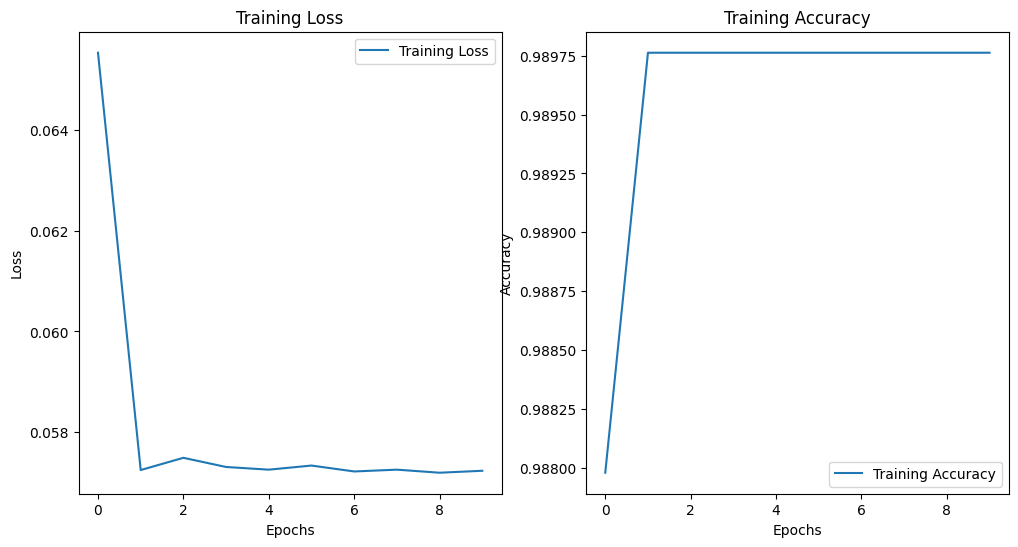

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
y_pred = model.predict(X_test_sequences)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(Y_test_sequences, y_pred)
accuracy = accuracy_score(Y_test_sequences, y_pred)

466/466 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


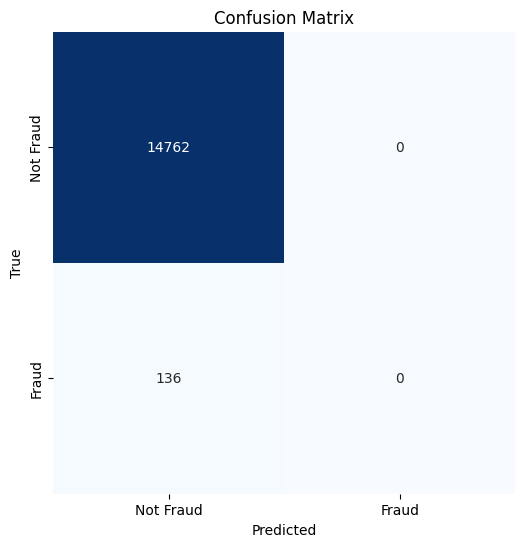

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.9908712578869647
